In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
train = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")
# test_y = pd.read_csv("test_labels.csv")
# train = train.sample(frac=0.5, random_state=1)


In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test.head()

NameError: name 'test' is not defined

In [ ]:
test_y.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000
mean,-0.542530,-0.579895,-0.558193,-0.580913,-0.559916,-0.577642
std,0.572465,0.498408,0.542966,0.496195,0.539594,0.503260
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.shape

(159571, 8)

In [ ]:
test.shape

(153164, 2)

<ipython-input-6-61344fd70031>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(comment_len, kde=False, bins=20, color="steelblue")


<Axes: xlabel='comment_text'>

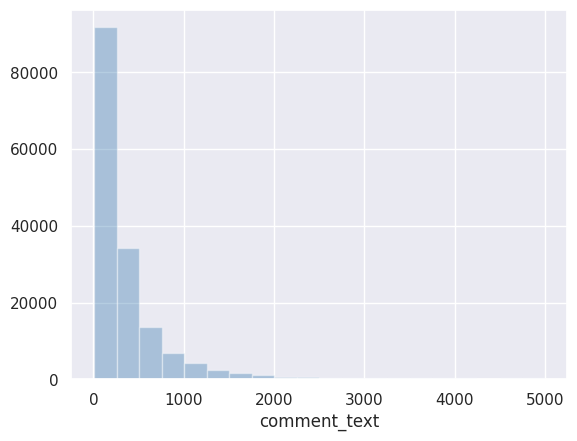

In [ ]:
sns.set(color_codes=True)
comment_len = train.comment_text.str.len()
sns.distplot(comment_len, kde=False, bins=20, color="steelblue")

In [ ]:
# Subsetting labels from the training data
train_labels = train[['toxic', 'severe_toxic',
                      'obscene', 'threat', 'insult', 'identity_hate']]
label_count = train_labels.sum()

<Axes: title={'center': 'Labels Frequency'}>

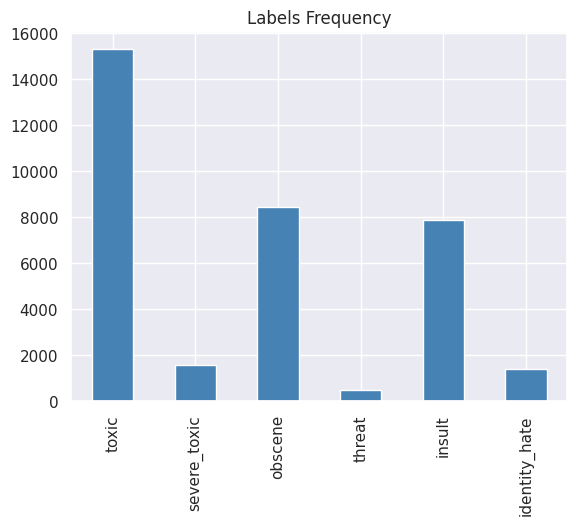

In [ ]:
label_count.plot(kind='bar', title='Labels Frequency', color='steelblue')

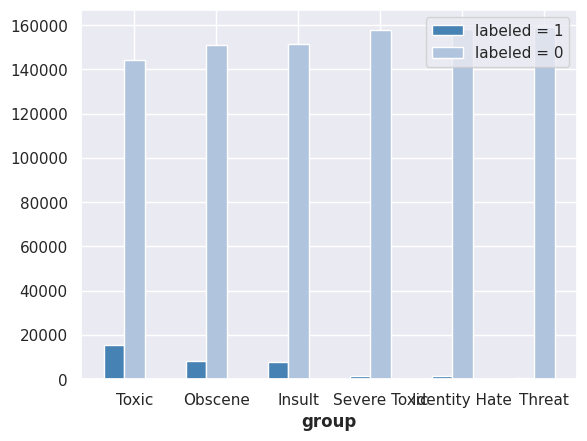

In [ ]:
# Code to draw bar graph for visualising distribution of classes within each label.
barWidth = 0.25


bars1 = [sum(df['toxic'] == 1), sum(df['obscene'] == 1), sum(df['insult'] == 1), sum(df['severe_toxic'] == 1),
         sum(df['identity_hate'] == 1), sum(df['threat'] == 1)]
bars2 = [sum(df['toxic'] == 0), sum(df['obscene'] == 0), sum(df['insult'] == 0), sum(df['severe_toxic'] == 0),
         sum(df['identity_hate'] == 0), sum(df['threat'] == 0)]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='steelblue', width=barWidth, label='labeled = 1')
plt.bar(r2, bars2, color='lightsteelblue', width=barWidth, label='labeled = 0')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate',
                                                       'Threat'])
plt.legend()
plt.show()

In [ ]:
# example of clean comment
train.comment_text[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
# example of toxic comment
train[train.toxic == 1].iloc[1, 1]

'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...'

<Axes: >

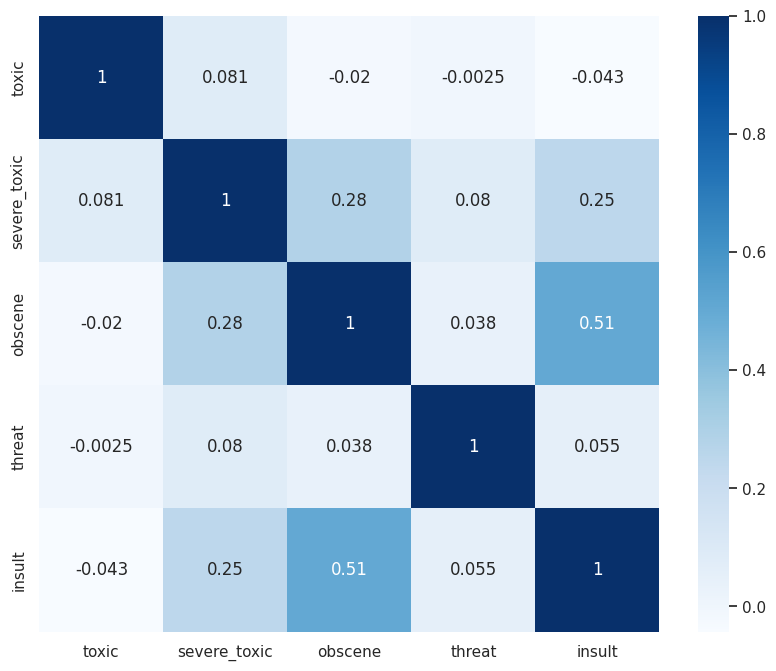

In [ ]:
# Cross correlation matrix across labels
rowsums = train.iloc[:, 2:].sum(axis=1)
temp = train.iloc[:, 2:-1]
train_corr = temp[rowsums > 0]
corr = train_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="Blues")

In [ ]:
def W_Cloud(token):
    """
    Visualize the most common words contributing to the token.
    """
    threat_context = train[train[token] == 1]
    threat_text = threat_context.comment_text
    neg_text = pd.Series(threat_text).str.cat(sep=' ')
    wordcloud = WordCloud(width=1600, height=800,
                          max_font_size=200).generate(neg_text)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Most common words assosiated with {token} comment", size=20)
    plt.show()

Choose a class to visualize the most common words contributing to the class:identity_hate


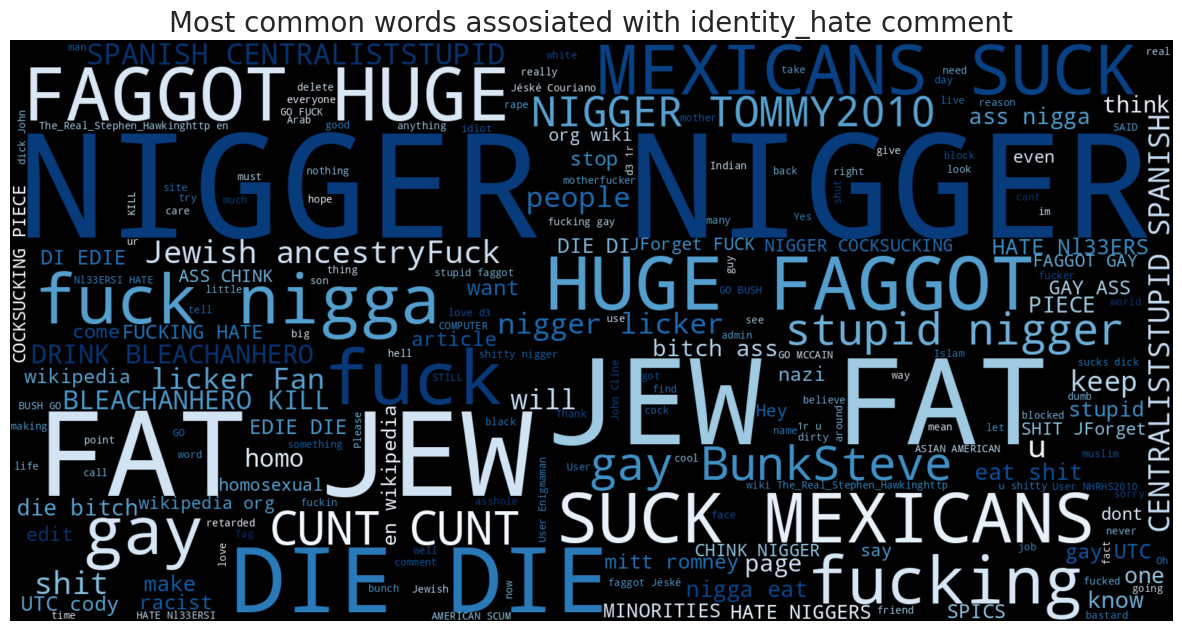

In [ ]:
token = input(
    'Choose a class to visualize the most common words contributing to the class:')
W_Cloud(token.lower())


In [ ]:
test_labels = ["toxic", "severe_toxic", "obscene",
               "threat", "insult", "identity_hate"]

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
# Make sure to download these once at the start of your script/notebook
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Data Preprocessing

In [ ]:
import re
# Preprocess the data
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if not word in stop_words]
    tokens = [word for word in tokens if len(word) > 2]
    return tokens


The above function takes a string of text as input and performs several preprocessing steps to prepare it for further natural language processing tasks:


* Converts all text to lowercase to ensure consistency.
* Removes any numbers with a regular expression that looks for one or more digits.
* Strips out URLs, which typically start with "http" and continue until a space is encountered.
* Eliminates special characters, retaining only alphanumeric characters and whitespace.
* Tokenizes the cleaned text into individual words.
* Filters out any stop words from the tokens, which are common words that usually do not contribute to the meaning of the text.
* Discards words that are less than three characters long, as these are often not meaningful.

In [ ]:
train['tokens'] = train['comment_text'].apply(preprocess_text)

In [ ]:
train['tokens'].head()

0    [explanation, edits, made, username, hardcore,...
1    [daww, matches, background, colour, seemingly,...
2    [hey, man, really, trying, edit, war, guy, con...
3    [cant, make, real, suggestions, improvement, w...
4           [sir, hero, chance, remember, page, thats]
Name: tokens, dtype: object

### Embedding

In [ ]:
# Word2Vec embedding
model_w2v = Word2Vec(sentences=train['tokens'], vector_size=100, window=5, min_count=2, workers=4)

# Transform each comment into a vector
def comment_to_avg_vector(comment, model):
    words = comment
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    else:
        return np.mean(word_vectors, axis=0)

X = np.array([comment_to_avg_vector(comment, model_w2v) for comment in train['tokens']])


In [ ]:
# Preparing the target labels
label_encoder = LabelEncoder()
y = train.iloc[:, 2:8].values

# y = np.array([np.argmax(row) for row in y])  # Convert one-hot to index
# y = label_encoder.fit_transform(y)  # Encode target labels
# y = to_categorical(y)  # Convert labels to one-hot


In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y_train.shape

(127656, 6)

## CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [ ]:
# Define the CNN model
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=100))  # Input layer
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(6, activation='softmax'))  # Output layer for multi-label classification
model.add(Dense(6, activation='sigmoid'))  # Output layer for multi-label classification


# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the CNN model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32, verbose=1)

# Evaluate the model's performance on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=2)
print(f"Validation Accuracy: {val_accuracy}")

Epoch 1/5
3990/3990 [==============================] - 18s 4ms/step - loss: 0.0744 - accuracy: 0.8944 - val_loss: 0.0653 - val_accuracy: 0.9941
Epoch 2/5
3990/3990 [==============================] - 13s 3ms/step - loss: 0.0666 - accuracy: 0.9592 - val_loss: 0.0637 - val_accuracy: 0.9925
Epoch 3/5
3990/3990 [==============================] - 13s 3ms/step - loss: 0.0653 - accuracy: 0.9651 - val_loss: 0.0627 - val_accuracy: 0.9941
Epoch 4/5
3990/3990 [==============================] - 14s 3ms/step - loss: 0.0643 - accuracy: 0.9564 - val_loss: 0.0621 - val_accuracy: 0.9941
Epoch 5/5
3990/3990 [==============================] - 13s 3ms/step - loss: 0.0641 - accuracy: 0.9642 - val_loss: 0.0624 - val_accuracy: 0.9937
998/998 - 1s - loss: 0.0624 - accuracy: 0.9937 - 1s/epoch - 1ms/step
Validation Accuracy: 0.9937333464622498


In [ ]:
from tensorflow.keras.models import load_model

# Assuming 'model' is your trained model
predictions = model.predict(X_val)
predictions_binary = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels


998/998 [==============================] - 2s 2ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate accuracy for each label
accuracies = []
for i in range(predictions_binary.shape[1]):  # Loop over each label
    acc = accuracy_score(y_val[:, i], predictions_binary[:, i])
    accuracies.append(acc)
    print(f"Accuracy for label {i}: {acc}")

# Detailed classification report
print(classification_report(y_val, predictions_binary, target_names=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']))


Accuracy for label 0: 0.9488955036816544
Accuracy for label 1: 0.989942033526555
Accuracy for label 2: 0.9718000939996867
Accuracy for label 3: 0.9977440075199749
Accuracy for label 4: 0.9671627761240796
Accuracy for label 5: 0.9909760300798998
               precision    recall  f1-score   support

        toxic       0.91      0.52      0.66      3056
 severe_toxic       0.00      0.00      0.00       321
      obscene       0.87      0.56      0.68      1715
       threat       0.75      0.04      0.08        74
       insult       0.78      0.49      0.60      1614
identity_hate       1.00      0.02      0.04       294

    micro avg       0.86      0.47      0.61      7074
    macro avg       0.72      0.27      0.34      7074
 weighted avg       0.83      0.47      0.59      7074
  samples avg       0.05      0.04      0.04      7074



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming predictions_binary and y_val are already defined as shown in your setup
# Convert these into boolean arrays for easier comparison
predictions_binary = (predictions > 0.4).astype(int)

# Exact Match Ratio / Subset Accuracy: Checks if all predicted labels match the actual labels
exact_match_accuracy = np.all(predictions_binary == y_val, axis=1).mean()

print(f"Exact Match Ratio (Subset Accuracy): {exact_match_accuracy:.2f}")

# the detailed classification report for label-based metrics
print(classification_report(y_val, predictions_binary, target_names=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']))


Exact Match Ratio (Subset Accuracy): 0.91
               precision    recall  f1-score   support

        toxic       0.86      0.58      0.69      3056
 severe_toxic       1.00      0.01      0.01       321
      obscene       0.82      0.63      0.71      1715
       threat       0.60      0.08      0.14        74
       insult       0.71      0.59      0.64      1614
identity_hate       0.94      0.05      0.10       294

    micro avg       0.81      0.54      0.65      7074
    macro avg       0.82      0.32      0.38      7074
 weighted avg       0.82      0.54      0.62      7074
  samples avg       0.05      0.05      0.05      7074



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


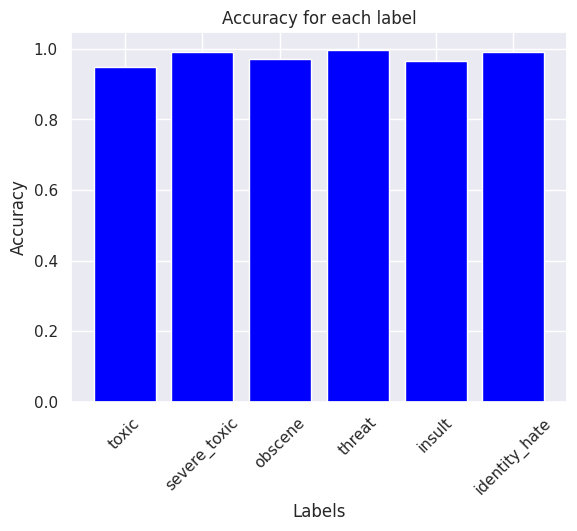

In [ ]:
import matplotlib.pyplot as plt

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
plt.bar(labels, accuracies, color='blue')
plt.xlabel('Labels')
plt.ylabel('Accuracy')
plt.title('Accuracy for each label')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from nltk.tokenize import word_tokenize
import re
import numpy as np
from gensim.models import Word2Vec

# Assuming model_w2v is your trained Word2Vec model
def preprocess_and_embed(text, model_w2v):
    stop_words = set(stopwords.words('english'))
    # Clean text
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]

    # Convert tokens to vector
    vector = np.mean([model_w2v.wv[token] for token in tokens if token in model_w2v.wv], axis=0)
    return np.array([vector])

# Update the function as necessary to match your specific preprocessing pipeline


In [ ]:
def predict_toxicity(model, model_w2v):
    # Get input text from the user
    input_text = input("Enter text for toxicity prediction: ")

    # Preprocess the text and embed using Word2Vec
    X = preprocess_and_embed(input_text, model_w2v)

    # Check for empty or invalid input handling
    if X.shape[1] != model_w2v.vector_size or np.isnan(X).any():
        print("Error: Text contains words not in the vocabulary or other issues.")
        return

    # Predict using the model
    predictions = model.predict(X)
    labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    prediction_dict = dict(zip(labels, predictions.flatten()))

    return prediction_dict

In [ ]:
# Example usage
predicted_labels = predict_toxicity(model, model_w2v)
print(predicted_labels)


Enter text for toxicity prediction: FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!
1/1 [==============================] - 0s 21ms/step
{'toxic': 0.9986494, 'severe_toxic': 0.34139073, 'obscene': 0.9863758, 'threat': 0.080665566, 'insult': 0.8059605, 'identity_hate': 0.18610293}


## LSTM

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D

# Tokenization and integer encoding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['tokens'])  # Assuming 'tokens' are already prepared as lists of words
sequences = tokenizer.texts_to_sequences(train['tokens'])

# Padding sequences
max_length = max(len(x) for x in sequences)  # Or choose a fixed length
X = pad_sequences(sequences, maxlen=max_length, padding='post')

# Preparing the target labels remains the same
y = train.iloc[:, 2:8].values

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# LSTM Model Definition
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1250, 100)         260500    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 1250, 100)         0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_7 (Dense)             (None, 6)                 606       
                                                                 
Total params: 341506 (1.30 MB)
Trainable params: 341506 (1.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/5
4/4 [==============================] - 7s 1s/step - loss: 0.6688 - accuracy: 0.1719 - val_loss: 0.6225 - val_accuracy: 1.0000
Epoch 2/5
4/4 [==============================] - 5s 1s/step - loss: 0.5575 - accuracy: 0.9531 - val_loss: 0.4055 - val_accuracy: 1.0000
Epoch 3/5
4/4 [==============================] - 6s 1s/step - loss: 0.2907 - accuracy: 1.0000 - val_loss: 0.2345 - val_accuracy: 1.0000
Epoch 4/5
4/4 [==============================] - 4s 1s/step - loss: 0.1786 - accuracy: 1.0000 - val_loss: 0.2080 - val_accuracy: 1.0000
Epoch 5/5
4/4 [==============================] - 5s 1s/step - loss: 0.1569 - accuracy: 1.0000 - val_loss: 0.2013 - val_accuracy: 1.0000


In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Padding sequences to ensure uniform input size
# max_length = 200  # You can choose a different length based on your data
# X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post')
# X_val_padded = pad_sequences(X_val, maxlen=max_length, padding='post')

# # Define the LSTM model
# model = Sequential()
# model.add(Embedding(input_dim=len(model_w2v.wv.index_to_key), output_dim=100, input_length=max_length))
# model.add(LSTM(128, return_sequences=True))
# model.add(GlobalMaxPooling1D())  # This layer can help in reducing the sequence to a vector
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(6, activation='sigmoid'))  # Output layer

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Display model architecture
# print(model.summary())


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          9173600   
                                                                 
 lstm (LSTM)                 (None, 200, 128)          117248    
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                      

In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=2)
print(f"Validation Accuracy: {val_accuracy}")

# Predict and evaluate using metrics
# predictions = model.predict(X_val_padded)
predictions = model.predict(X_val)
predictions_binary = (predictions > 0.5).astype(int)

print(classification_report(y_val, predictions_binary, target_names=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']))


1/1 - 0s - loss: 0.2013 - accuracy: 1.0000 - 291ms/epoch - 291ms/step
Validation Accuracy: 1.0


1/1 [==============================] - 0s 470ms/step
               precision    recall  f1-score   support

        toxic       0.00      0.00      0.00         3
 severe_toxic       0.00      0.00      0.00         1
      obscene       0.00      0.00      0.00         3
       threat       0.00      0.00      0.00         0
       insult       0.00      0.00      0.00         3
identity_hate       0.00      0.00      0.00         0

    micro avg       0.00      0.00      0.00        10
    macro avg       0.00      0.00      0.00        10
 weighted avg       0.00      0.00      0.00        10
  samples avg       0.00      0.00      0.00        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344:

In [ ]:
# import re
# import string
# from nltk.stem.wordnet import WordNetLemmatizer
# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# def tokenize(text):
#     '''
#     Tokenize text and return a non-unique list of tokenized words found in the text.
#     Normalize to lowercase, strip punctuation, remove stop words, filter non-ascii characters.
#     Lemmatize the words and lastly drop words of length < 3.
#     '''
#     text = text.lower()
#     regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
#     nopunct = regex.sub(" ", text)
#     words = nopunct.split(' ')
#     # remove any non ascii
#     words = [word.encode('ascii', 'ignore').decode('ascii') for word in words]
#     lmtzr = WordNetLemmatizer()
#     words = [lmtzr.lemmatize(w) for w in words]
#     words = [w for w in words if len(w) > 2]
#     return words

In [ ]:
# vector = TfidfVectorizer(ngram_range=(1, 1), analyzer='word',
#                          tokenizer=tokenize, stop_words='english',
#                          strip_accents='unicode', use_idf=1, min_df=10)
# X_train = vector.fit_transform(train['comment_text'])
# X_test = vector.transform(test['comment_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


## Transformers

In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
candidate_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [ ]:
# Define the sequence to classify and the candidate labels
sequence = "Fuck you."


In [ ]:
# Perform zero-shot classification
results = classifier(sequence, candidate_labels)

print("Labels:", results['labels'])
print("Scores:", results['scores'])

Labels: ['insult', 'threat', 'toxic', 'identity_hate', 'severe_toxic', 'obscene']
Scores: [0.43729498982429504, 0.39923781156539917, 0.04664387181401253, 0.03944968432188034, 0.03930214047431946, 0.03807152807712555]


In [ ]:
train = train.sample(frac=0.00025, random_state=1)

In [ ]:
train.shape

(40, 9)

In [ ]:
def get_predictions(text):
    result = classifier(text, candidate_labels)
    # Convert probabilities to binary predictions based on a threshold
    predictions = [1 if score >= 0.5 else 0 for score in result['scores']]
    return dict(zip(result['labels'], predictions))

# Apply to a portion of the dataset for demonstration
train['predicted_labels'] = train['comment_text'].apply(get_predictions)


In [ ]:
from sklearn.metrics import accuracy_score

# Function to calculate accuracy for each label
def calculate_accuracy(data, true_labels):
    accuracies = {}
    for label in candidate_labels:
        # Extract predicted and actual labels for the current category
        y_pred = data['predicted_labels'].apply(lambda x: x[label])
        y_true = data[label]
        accuracies[label] = accuracy_score(y_true, y_pred)
    return accuracies

# Assuming your actual labels are binary [0,1] and stored in the same DataFrame
accuracies = calculate_accuracy(train, candidate_labels)
print("Accuracies by label:", accuracies)


Accuracies by label: {'toxic': 0.925, 'severe_toxic': 0.975, 'obscene': 0.95, 'threat': 0.775, 'insult': 0.975, 'identity_hate': 1.0}


### Rows accuracy

In [ ]:
from transformers import pipeline

# Load the classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
candidate_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

def get_predictions(text):
    result = classifier(text, candidate_labels)
    predictions = [1 if score >= 0.5 else 0 for score in result['scores']]
    return dict(zip(result['labels'], predictions))


In [ ]:
# Apply the prediction function to the 'comment_text' column
train['predicted_labels'] = train['comment_text'].apply(get_predictions)

In [ ]:
def calculate_row_accuracy(data, candidate_labels):
    # Function to check if all predicted labels match the actual labels for a row
    def is_row_correct(row):
        predicted_labels = row['predicted_labels']
        actual_labels = {label: row[label] for label in candidate_labels}
        return all(predicted_labels[label] == actual_labels[label] for label in candidate_labels)

    # Apply the row correctness check for each row in the DataFrame
    correct_rows = data.apply(is_row_correct, axis=1)
    accuracy = correct_rows.mean()
    return accuracy

# Calculate row-wise accuracy
row_accuracy = calculate_row_accuracy(train, candidate_labels)
print("Row-wise Accuracy:", row_accuracy)
